<h1 style="color: salmon">Exploratory Data Analysis</h1>
This is very important as I need to understand and like have a brief look into what the dataset has before deep dive into it.
Hope I can do it this time.

### 📂 Data Reference Tables (CITED FROM OG PAPER)

#### Table 2: Age Categories
| idAge | Rank | Description |
| :--- | :--- | :--- |
| **0** | <=18 | Minor / Student |
| **1** | 19-25 | Young Adult |
| **2** | 26-35 | Early Career |
| **3** | 36-45 | Middle Age |
| **4** | 46-55 | Senior Professional |
| **5** | 56-65 | Pre-Retirement |
| **6** | >65 | Retired |
| **U** | Unknown | Missing Data |

#### Table 3: Gender Categories
| idGender | Description |
| :--- | :--- |
| **E** | ENTERPRISE (Business Account) |
| **F** | FEMALE |
| **M** | MALE |
| **U** | UNKNOWN / UNDISCLOSED |

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Datasets/lastest.csv", encoding="utf-8")

In [2]:
df.columns.to_list()

['step',
 'customer',
 'age',
 'gender',
 'zipcodeOri',
 'merchant',
 'zipMerchant',
 'category',
 'amount',
 'fraud']

In [3]:
df.shape

(594643, 10)

In [4]:
df.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [5]:
df.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [7]:
# See how many unique values are in every column
print(df.nunique())

# => must drop both ZIP cols

step             180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
dtype: int64


In [8]:
df.isna().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [9]:
df["fraud"].value_counts()

fraud
0    587443
1      7200
Name: count, dtype: int64

In [10]:
# Splits at '_' and takes the second part (index 1)
df['category_fixed'] = df['category'].str.strip("'").str.split('_').str[1]
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,category_fixed
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0,transportation
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0,transportation
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0,transportation
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0,transportation
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0,transportation


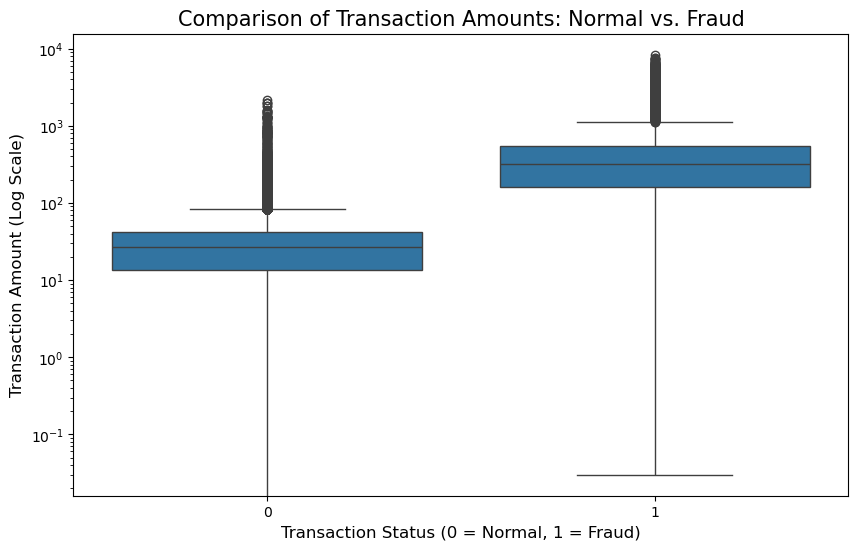

In [11]:
plt.figure(figsize=(10, 6))
graph = sns.boxplot(data=df, x="fraud", y="amount")
graph.set_yscale("log")
plt.title('Comparison of Transaction Amounts: Normal vs. Fraud', fontsize=15)
plt.xlabel('Transaction Status (0 = Normal, 1 = Fraud)', fontsize=12)
plt.ylabel('Transaction Amount (Log Scale)', fontsize=12)
plt.show()

# Both the IQR and the Median of Fraud is significantly higher => FRAUD OFTEN EXISTS IN HIGH TRANSACTION

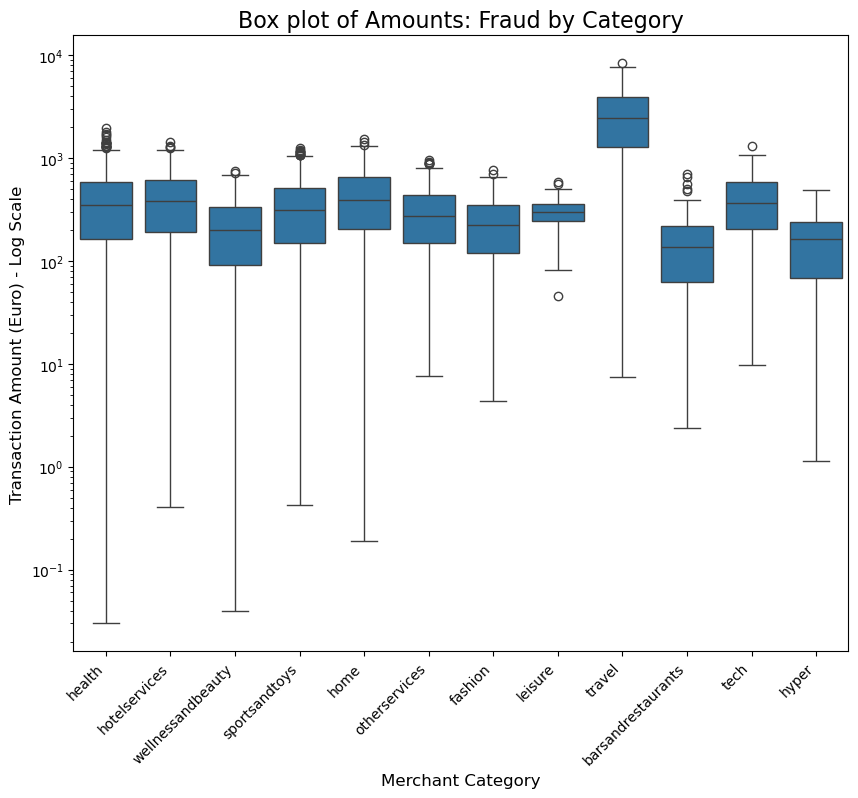

In [12]:
# Amount vs Category in Fraud
fraud_df = df[df["fraud"]==1]

plt.figure(figsize=(10, 8))
sns.boxplot(data=fraud_df, x='category_fixed', y='amount')

plt.yscale('log') 

plt.title('Box plot of Amounts: Fraud by Category', fontsize=16)
plt.xlabel('Merchant Category', fontsize=12)
plt.ylabel('Transaction Amount (Euro) - Log Scale', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.show()

In [13]:
df["age"].value_counts()

age
'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: count, dtype: int64

In [14]:
df["gender"].value_counts()

gender
'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: count, dtype: int64

In [15]:
# This creates a table showing exactly how many fraud cases exist per gender
print(pd.crosstab(df['gender'], df['fraud']))

fraud        0     1
gender              
'E'       1171     7
'F'     319807  4758
'M'     265950  2435
'U'        515     0


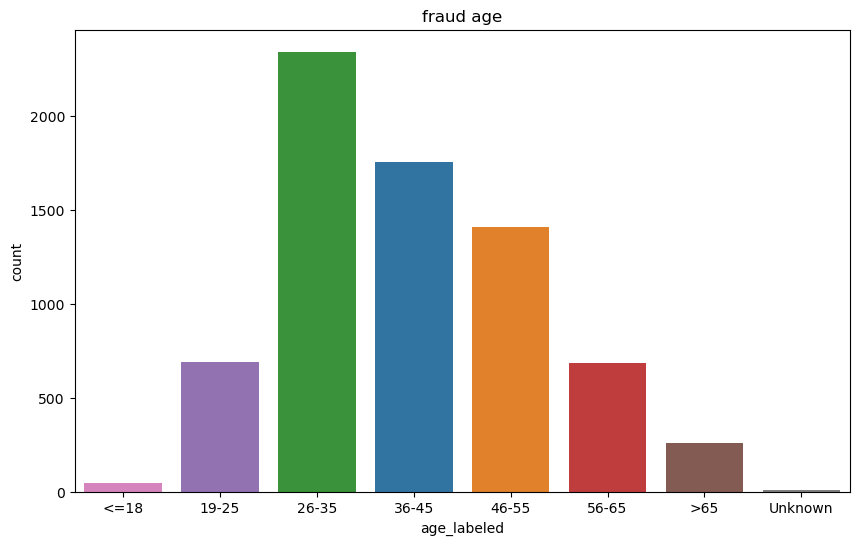

In [16]:
age_map = {
    "'0'": "<=18", "'1'": "19-25", "'2'": "26-35", "'3'": "36-45", 
    "'4'": "46-55", "'5'": "56-65", "'6'": ">65", "'U'": "Unknown"
}

df['age_labeled'] = df['age'].map(age_map)

fraud_df = df[df['fraud'] == 1]
plt.figure(figsize=(10, 6))
sns.countplot(
    data=fraud_df, 
    x="age_labeled", 
    hue="age_labeled",
    order=["<=18", "19-25", "26-35", "36-45", "46-55", "56-65", ">65", "Unknown"]
    )
plt.title("fraud age")
plt.show()

# Fraud happens more on age group (26-35), (36-45) and (46-55)


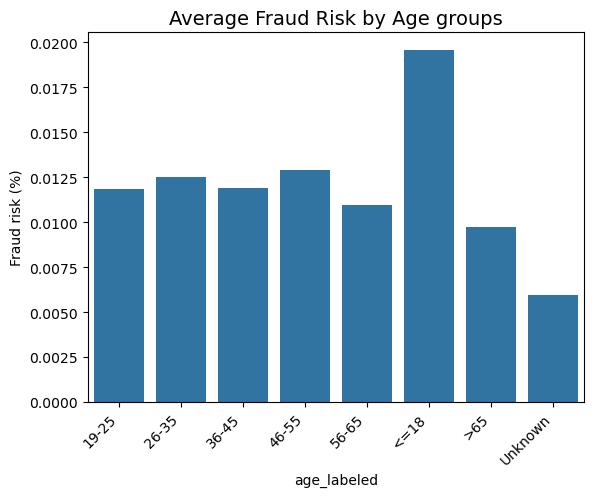

In [18]:
age_fraud_means = df.groupby('age_labeled')['fraud'].mean().reset_index()
sns.barplot(data=age_fraud_means, x='age_labeled', y="fraud")
plt.title('Average Fraud Risk by Age groups', fontsize=14)
plt.ylabel("Fraud risk (%)")
plt.xticks(rotation=45, ha='right') # Tilt the labels as discussed
plt.show()

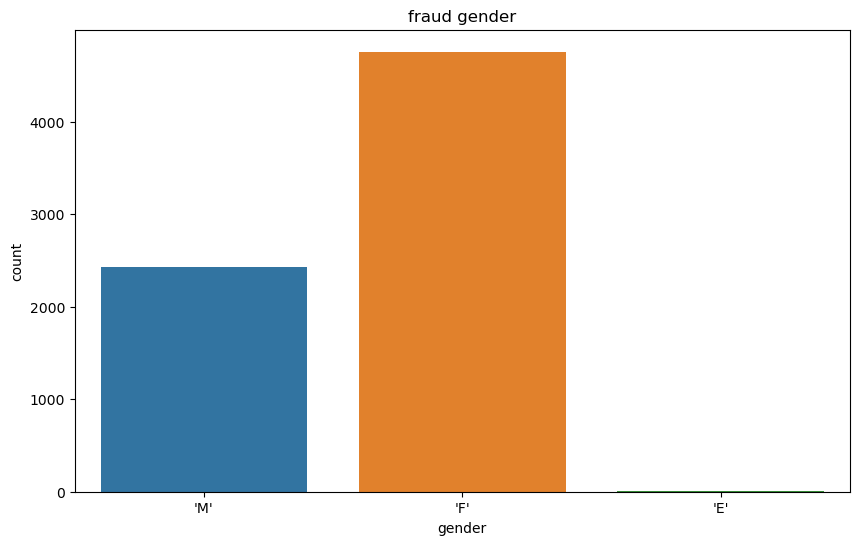

In [19]:
# Get only the fraud rows
fraud_df = df[df['fraud'] == 1]
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_df, x="gender", hue="gender")
plt.title("fraud gender")
plt.show()

# Fraud happens more on Female

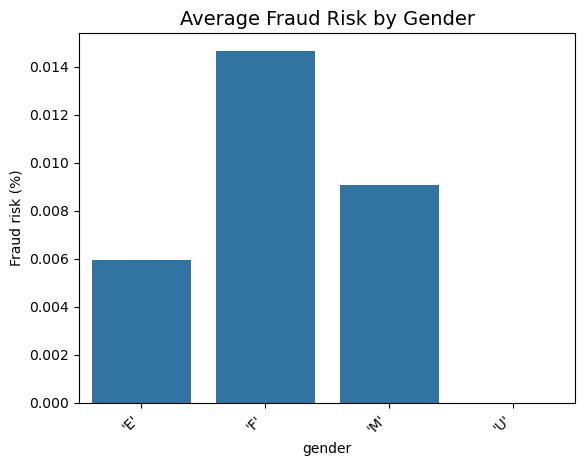

In [20]:
gender_fraud_means = df.groupby('gender')['fraud'].mean().reset_index()
# print(category_fraud_means)
sns.barplot(data=gender_fraud_means, x='gender', y="fraud")
plt.title('Average Fraud Risk by Gender', fontsize=14)
plt.ylabel("Fraud risk (%)")
plt.xticks(rotation=45, ha='right') # Tilt the labels as discussed
plt.show()

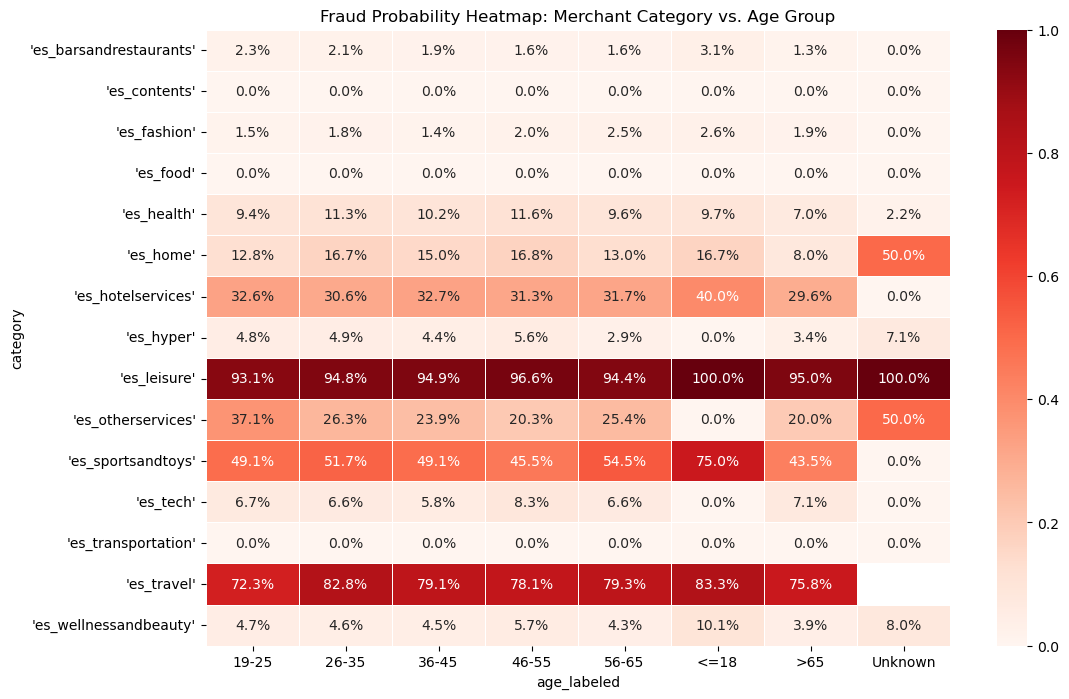

In [21]:
# Pivot table: Category vs Age Label
heatmap_data = pd.pivot_table(df, index='category', columns='age_labeled', values='fraud', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt=".1%", linewidths=.5)
plt.title("Fraud Probability Heatmap: Merchant Category vs. Age Group")
plt.show()

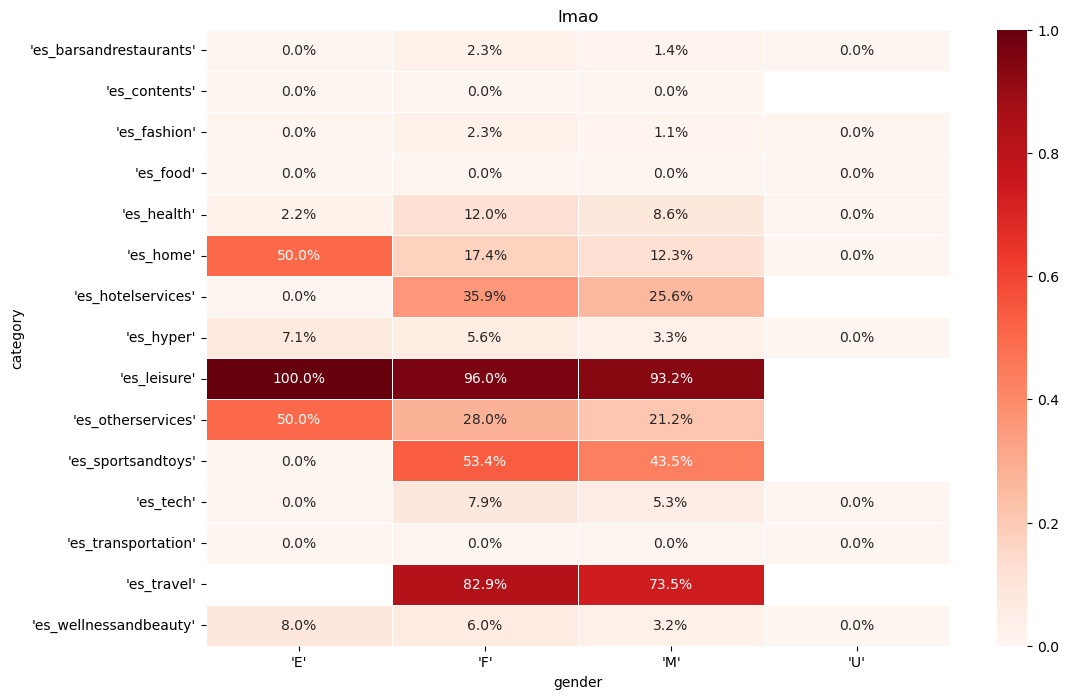

In [22]:
heatmap_data = pd.pivot_table(df, index='category', columns='gender', values='fraud', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt=".1%", linewidths=.5)
plt.title("lmao")
plt.show()

In [24]:
gender_e_fraud = df[(df['gender'] == 'E') & (df['fraud'] == 1)]

# 2. Use len() to count the number of rows in that filtered list
total_cases = len(gender_e_fraud)
print(total_cases)

0


In [ ]:
fraud_merchants = df[df['fraud'] == 1]['merchant'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_merchants.index, y=fraud_merchants.values)
plt.title("Top 10 Merchants by Fraud Volume")
plt.xlabel("Merchant ID")
plt.ylabel("Count of Fraudulent Transactions")
plt.xticks(rotation=45)
plt.show()

In [ ]:
fraud_df = df[df['fraud'] == 1]
plt.figure(figsize=(8, 6))
sns.countplot(data=fraud_df, x="category_fixed", hue="category_fixed")
plt.xticks(rotation=45, ha='right')
plt.title("Fraud count in each catergory")
plt.show()

# sportandtoys, health in wellnessandbeuty are top 3

In [ ]:
category_fraud_means = df.groupby('category_fixed')['fraud'].mean().reset_index()
# print(category_fraud_means)
sns.barplot(data=category_fraud_means, x='category_fixed', y="fraud")
plt.title('Average Fraud Risk by Merchant Category', fontsize=14)
plt.ylabel("Fraud risk (%)")
plt.xticks(rotation=45, ha='right') # Tilt the labels as discussed
plt.show()

# => leisure, sportsandtoys and travel have the higher risk

In [ ]:
# Since your dataset uses a mapping where 1 step equals 1 hour of real-world time
# this transformation is essential for uncovering behavioral patterns.
# Now the transform only show the hour in the day it appears like 2AM, maybe in the different day

def step_to_hour(row):
    return row % 24

df["hour_of_day"] = df["step"].apply(step_to_hour)

df["hour_of_day"].value_counts()


In [ ]:
fraud_df = df[df['fraud'] == 1]

sns.countplot(data=fraud_df, x="hour_of_day")
plt.title("Fraud by Hour of day")
plt.xlabel("Hour (0 = Midnight)", fontsize=12)
plt.ylabel("Number of Fraudulent Transactions", fontsize=12)
plt.show()

# Linear duration => weak feature

In [ ]:
# Group into each customer and their total TIME of transactions within a step
customer_velocity = df.groupby(['customer', 'step']).size().reset_index(name='transaction_count')
# How many of them were fraud still within the above step
fraud_status = df.groupby(['customer', 'step'])['fraud'].max().reset_index()
velocity_graph = pd.merge(customer_velocity, fraud_status, on=['customer', 'step'])

sns.boxplot(data=velocity_graph, x="fraud", y="transaction_count")
plt.title("Transaction Velocity: Do Fraudsters 'Spam' Transactions?")
plt.xlabel("Fraud Status (0=Normal, 1=Fraud)")
plt.ylabel("Transactions per Step")
plt.show()

# YES THEY DO

In [ ]:
# lmao_df = df[df["customer"]=="'C1000148617'"]
# lmao_df.head()

count = len(df[df['customer'] == "'C1000148617'"])
print(f"Customer C1000148617 has {count} transactions.")